<a href="https://colab.research.google.com/github/Silverflon-07/rice-deep-2025/blob/main/DEEP_Leonardo_Garcia_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# note that this command will trigger a request from google to allow colab
# to access your files: you will need to accept the terms in order to access
# the files this way
# if you prefer not to mount your Google Drive to colab, you are welcome to
# reupload the data each time
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DATADIR = '/content/drive/My Drive/DEEP - Housing Prices/data'

Mounted at /content/drive


In [ ]:
# Load datasets
train = pd.read_csv("/content/drive/My Drive/DEEP/leo train.csv")
test = pd.read_csv("/content/drive/My Drive/DEEP/leo test.csv")
print(train.shape)   # rows and columns
print(train.columns.tolist())

(1460, 81)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

In [ ]:
train.describe()
train.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [ ]:
train.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


Location

In [ ]:
train_sub = train[["Neighborhood", "Condition1","Condition2","SalePrice"]]

train_sub

,Neighborhood,Condition1,Condition2,SalePrice
0,CollgCr,Norm,Norm,208500
1,Veenker,Feedr,Norm,181500
2,CollgCr,Norm,Norm,223500
3,Crawfor,Norm,Norm,140000
4,NoRidge,Norm,Norm,250000
5,Mitchel,Norm,Norm,143000
6,Somerst,Norm,Norm,307000
7,NWAmes,PosN,Norm,200000
8,OldTown,Artery,Norm,129900
9,BrkSide,Artery,Artery,118000


In [ ]:
from sklearn.preprocessing import LabelEncoder

train_neigh = train[["Neighborhood","SalePrice"]]

#le = LabelEncoder()
#labelled_data = le.fit_transform(train_neigh['Neighborhood'])
#train_neigh['Neighborhood'] = pd.Series(labelled_data)




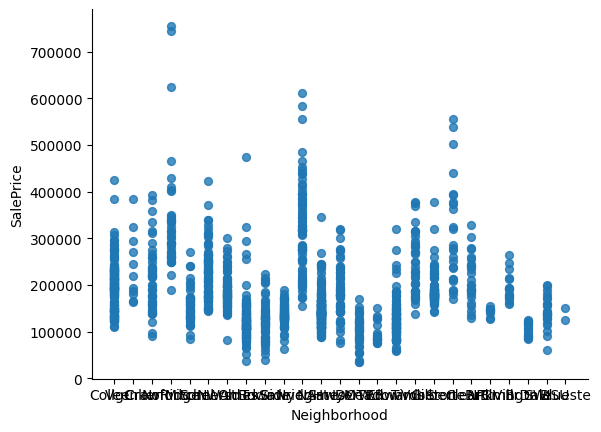

In [ ]:
from matplotlib import pyplot as plt
train_neigh.plot(kind='scatter', x='Neighborhood', y='SalePrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train_neigh.groupby("Neighborhood").mean()


,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571
CollgCr,197965.773333
Crawfor,210624.725490
Edwards,128219.700000
Gilbert,192854.506329


In [ ]:
highest_avg_neighborhood = train_neigh_mean['SalePrice'].idxmax()
lowest_avg_neighborhood = train_neigh_mean['SalePrice'].idxmin()

highest_avg_price = train_neigh_mean['SalePrice'].max()
lowest_avg_price = train_neigh_mean['SalePrice'].min()


Neighborhood with the highest average sale price: NoRidge (335295.32)
Neighborhood with the lowest average sale price: MeadowV (98576.47)


1.Neighborhood with the highest average sale price: NoRidge $335295.32
Neighborhood with the lowest average sale price: MeadowV $98576.47

<Figure size 1500x800 with 0 Axes>

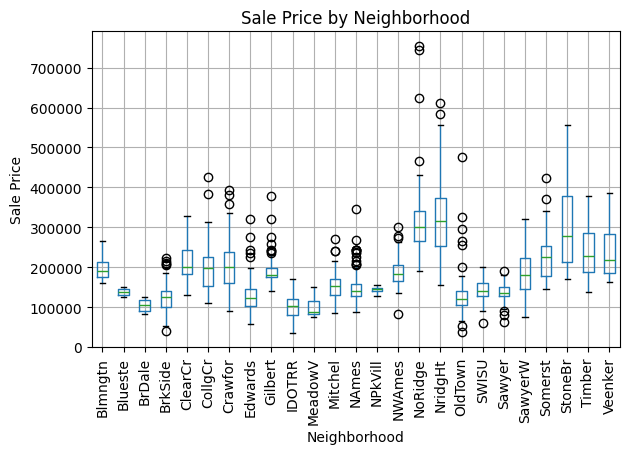

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
train_neigh.boxplot(column='SalePrice', by='Neighborhood', rot=90)
plt.title('Sale Price by Neighborhood')
plt.suptitle('') # Suppress the default suptitle generated by boxplot
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

In [ ]:
NridgHt_subset = train[train['Neighborhood'] == 'NridgHt']
display(meadowV_subset.head())
NridgHt_subset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,640.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1566,1566,GasA,Ex,Y,SBrkr,1600,0,0,1600,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,RFn,3,890,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
34,35,120,RL,60.0,7313,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,246.0,Ex,TA,PConc,Ex,TA,No,GLQ,1153,Unf,0,408,1561,GasA,Ex,Y,SBrkr,1561,0,0,1561,1,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2005.0,Fin,2,556,TA,TA,Y,203,47,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,277500


In [ ]:
NridgHt_subset = train[train['Neighborhood'] == 'NridgHt']

mean_beds_baths_nridght = NridgHt_subset[['BedroomAbvGr', 'FullBath', 'HalfBath']].mean()

display(mean_beds_baths_nridght)

,0
BedroomAbvGr,2.701299
FullBath,2.038961
HalfBath,0.415584


In [ ]:
meadowV_subset = train[train['Neighborhood'] == 'MeadowV']
display(meadowV_subset.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
23,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,1Story,5,7,1976,1976,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,840,Unf,0,200,1040,GasA,TA,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,Unf,2,572,TA,TA,Y,100,110,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
75,76,180,RM,21.0,1596,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SLvl,4,5,1973,1973,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,462,Unf,0,0,462,GasA,TA,Y,SBrkr,526,462,0,988,1,0,1,0,2,1,TA,5,Typ,0,NaN,BuiltIn,1973.0,Unf,1,297,TA,TA,Y,120,101,0,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000
344,345,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,5,3,1976,1976,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,No,Rec,129,BLQ,232,175,536,GasA,TA,Y,SBrkr,536,576,0,1112,0,0,1,1,3,1,TA,4,Typ,0,NaN,Attchd,1976.0,Unf,1,336,TA,TA,Y,182,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
357,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,1Story,5,5,1976,1976,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,PConc,Gd,TA,No,ALQ,874,Unf,0,268,1142,GasA,TA,Y,SBrkr,1142,0,0,1142,1,0,1,1,3,1,TA,6,Typ,1,Po,Attchd,1976.0,Fin,2,528,TA,TA,Y,536,90,0,0,0,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000
434,435,180,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,Gd,TA,Av,ALQ,495,Unf,0,135,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,81000


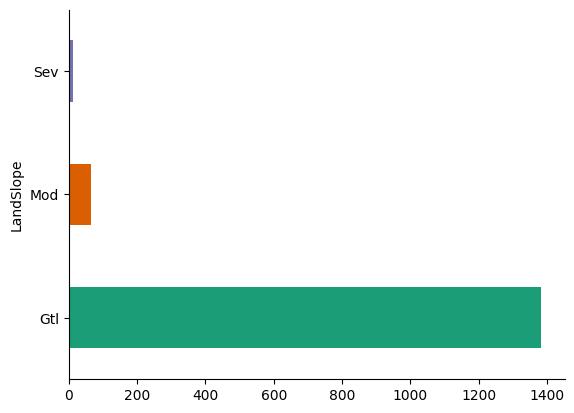

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
train_landslope_saleprice.groupby('LandSlope').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

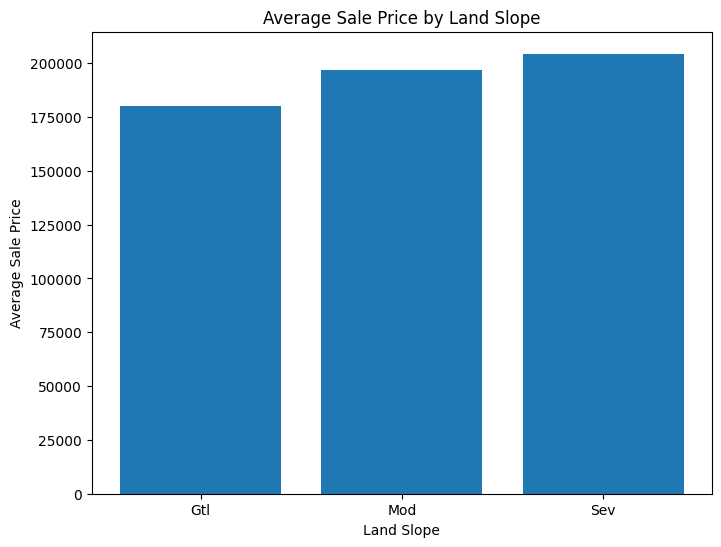

In [ ]:
import matplotlib.pyplot as plt

average_saleprice_by_landslope = train_landslope_saleprice.groupby('LandSlope')['SalePrice'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(average_saleprice_by_landslope['LandSlope'], average_saleprice_by_landslope['SalePrice'])
plt.title('Average Sale Price by Land Slope')
plt.xlabel('Land Slope')
plt.ylabel('Average Sale Price')
plt.show()

2. Homes with a more severe land slope will sell for more

In [ ]:
zones = train.loc[:,["MSZoning","SalePrice"]]
zones

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000
5,RL,143000
6,RL,307000
7,RL,200000
8,RM,129900
9,RL,118000


from matplotlib import pyplot as plt
zones['SalePrice'].plot(kind='hist', bins=20, title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
zones.groupby('MSZoning').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
zones['SalePrice'].plot(kind='line', figsize=(8, 4), title='SalePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(zones['MSZoning'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(zones, x='SalePrice', y='MSZoning', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

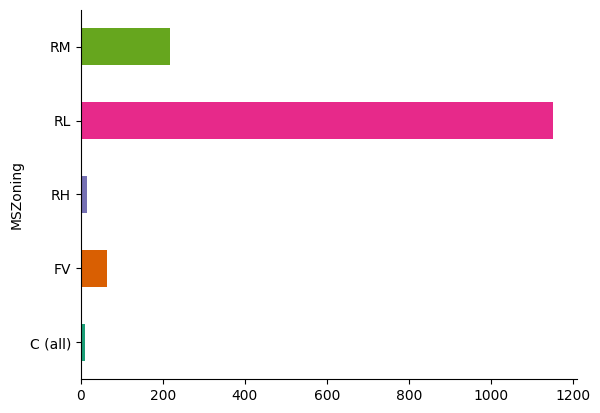

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
zones.groupby('MSZoning').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

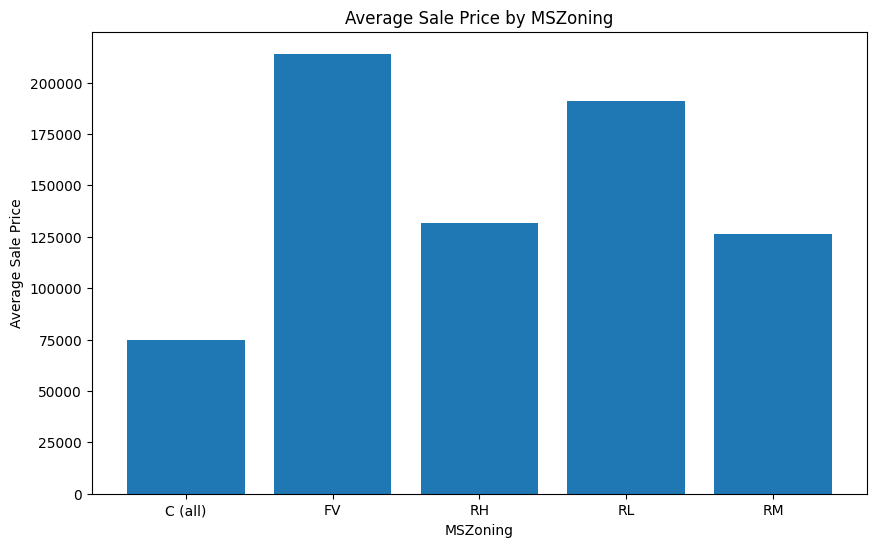

In [ ]:
import matplotlib.pyplot as plt

average_saleprice_by_mszoning = zones.groupby('MSZoning')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_saleprice_by_mszoning['MSZoning'], average_saleprice_by_mszoning['SalePrice'])
plt.title('Average Sale Price by MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('Average Sale Price')
plt.show()

3. Floating Village Residential and Residential Low Density will be associated with higher home prices

In [ ]:
# 1) LotFrontage by Neighborhood
lf_by_nbhd = train.groupby("Neighborhood")["LotFrontage"].median()
train["LotFrontage_imputed"] = train["LotFrontage"]
for nb, med in lf_by_nbhd.items():
    sel = (train["Neighborhood"]==nb) & (train["LotFrontage_imputed"].isna())
    train.loc[sel, "LotFrontage_imputed"] = med

# 2) High-missing categoricals -> "None"
fill_none_cols = [
    "Alley","PoolQC","Fence","MiscFeature",
    "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "GarageType","GarageFinish","GarageQual","GarageCond",
    "MasVnrType","FireplaceQu"
]
for col in fill_none_cols:
    if col in train.columns:
        train[col] = train[col].fillna("None")

# 3) Basement numeric -> 0 when no basement
bsmt_num = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]
for col in bsmt_num:
    if col in train.columns:
        # set 0 where basement label is None OR value is NaN
        no_bsmt = train["BsmtQual"].eq("None") if "BsmtQual" in train else train[col].isna()
        train.loc[no_bsmt | train[col].isna(), col] = 0

# 4) Garage numeric -> 0 when no garage
gar_num = ["GarageCars","GarageArea"]
for col in gar_num:
    if col in train.columns:
        no_gar = train["GarageType"].eq("None") if "GarageType" in train else train[col].isna()
        train.loc[no_gar | train[col].isna(), col] = 0

# 5) GarageYrBlt: if no garage -> 0; else fill with YearBuilt where missing
if "GarageYrBlt" in train.columns:
    # ensure type numeric
    train["GarageYrBlt"] = train["GarageYrBlt"].astype("float")
    no_gar = train["GarageType"].eq("None")
    has_gar_missing_year = (~no_gar) & (train["GarageYrBlt"].isna())
    train.loc[no_gar, "GarageYrBlt"] = 0
    if "YearBuilt" in train.columns:
        train.loc[has_gar_missing_year, "GarageYrBlt"] = train.loc[has_gar_missing_year, "YearBuilt"]

# 6) Masonry veneer: area 0 if type None; else impute median by type
if {"MasVnrArea","MasVnrType"}.issubset(train.columns):
    train.loc[train["MasVnrType"].eq("None"), "MasVnrArea"] = 0
    mask = train["MasVnrType"].ne("None") & train["MasVnrArea"].isna()
    med_by_type = train.groupby("MasVnrType")["MasVnrArea"].median()
    for t, med in med_by_type.items():
        sel = mask & train["MasVnrType"].eq(t)
        train.loc[sel, "MasVnrArea"] = med

# 7) Electrical mode
if "Electrical" in train.columns and train["Electrical"].isna().any():
    train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])

# 8) Fireplace quality consistency
if {"Fireplaces","FireplaceQu"}.issubset(train.columns):
    # None if 0 fireplaces
    train.loc[train["Fireplaces"]==0, "FireplaceQu"] = "None"
    # If fireplaces>0 but quality missing -> mode of non-None
    miss = (train["Fireplaces"]>0) & train["FireplaceQu"].eq("None")
    if miss.any():
        mode_q = train.loc[train["FireplaceQu"].ne("None"), "FireplaceQu"].mode()
        if len(mode_q):
            train.loc[miss, "FireplaceQu"] = mode_q[0]

In [ ]:

feat = train.copy()

# Safe helpers to avoid NaN in arithmetic
z = lambda s: s.fillna(0)

# Core engineered features (robust)
feat["TotalSF"]    = z(feat["1stFlrSF"]) + z(feat["2ndFlrSF"]) + z(feat["TotalBsmtSF"])
feat["TotalBaths"] = z(feat["FullBath"]) + 0.5*z(feat["HalfBath"]) + z(feat["BsmtFullBath"]) + 0.5*z(feat["BsmtHalfBath"])

feat["AgeAtSale"]  = (feat["YrSold"] - feat["YearBuilt"]).clip(lower=0)      # no negatives
feat["SinceRemod"] = (feat["YrSold"] - feat["YearRemodAdd"]).clip(lower=0)   # no negatives

In [ ]:
qual_map = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
cond_map = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
fin_map = {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
expo_map = {"None":0, "No":1, "Mn":2, "Av":3, "Gd":4}
finish_map = {"None":0, "Unf":1, "RFn":2, "Fin":3}
pave_map = {"N":0, "P":1, "Y":2}
func_map = {"Sal":0, "Sev":1, "Maj2":2, "Maj1":3, "Mod":4,
            "Min2":5, "Min1":6, "Typ":7}
fence_map = {"None":0, "MnPrv":1, "GdPrv":2, "MnWw":3, "GdWo":4}

#Apply mappings
train["OverallQual"] = train["OverallQual"].astype(int)
train["OverallCond"] = train["OverallCond"].astype(int)

train["ExterQual"]   = train["ExterQual"].map(qual_map)
train["ExterCond"]   = train["ExterCond"].map(cond_map)

train["BsmtQual"]    = train["BsmtQual"].map(qual_map)
train["BsmtCond"]    = train["BsmtCond"].map(cond_map)
train["BsmtFinType1"]= train["BsmtFinType1"].map(fin_map)
train["BsmtFinType2"]= train["BsmtFinType2"].map(fin_map)
train["BsmtExposure"]= train["BsmtExposure"].map(expo_map)

train["HeatingQC"]   = train["HeatingQC"].map(qual_map)
train["KitchenQual"] = train["KitchenQual"].map(qual_map)
train["FireplaceQu"] = train["FireplaceQu"].map(qual_map)

train["GarageQual"]  = train["GarageQual"].map(qual_map)
train["GarageCond"]  = train["GarageCond"].map(qual_map)
train["GarageFinish"]= train["GarageFinish"].map(finish_map)

train["PavedDrive"]  = train["PavedDrive"].map(pave_map)
train["Functional"]  = train["Functional"].map(func_map)
train["PoolQC"]      = train["PoolQC"].map(qual_map)
train["Fence"]       = train["Fence"].map(fence_map)

Questions about Renovations Characteristics:

Do remodeled homes (YearRemodAdd) sell for significantly more than non-remodeled homes of same age?

Is age of home (YrSold - YearBuilt) strongly correlate with lower sale prices, or do renovation offset these age effects

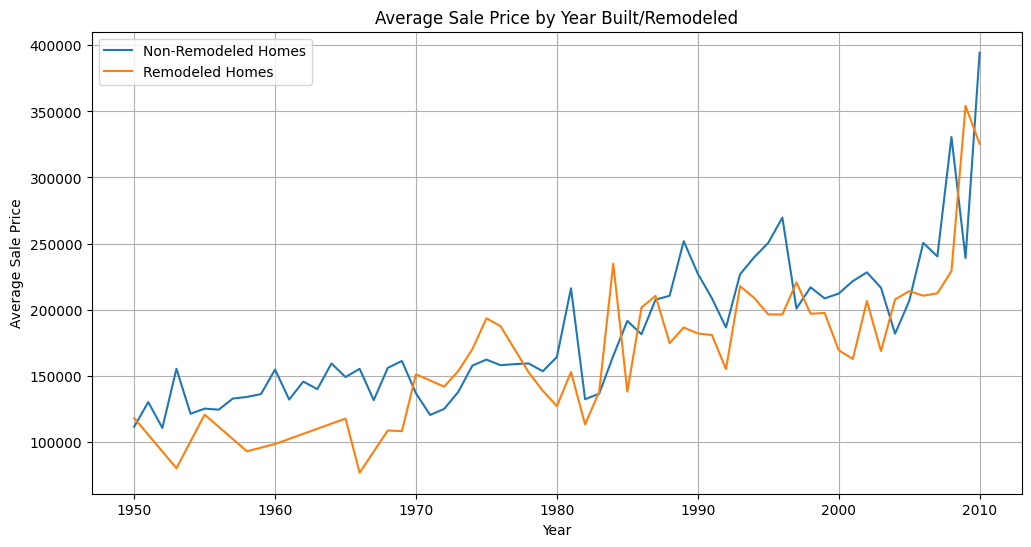

Average Sale Price (Overall):
   IsRemodeled      SalePrice
0            0  182583.659686
1            1  179096.307471


In [ ]:
import matplotlib.pyplot as plt

# Create a new column to identify remodeled homes
# A home is considered remodeled if YearRemodAdd is different from YearBuilt
train['IsRemodeled'] = (train['YearRemodAdd'] != train['YearBuilt']).astype(int)
# Calculate average sale price for remodeled and non-remodeled homes per year
average_saleprice_by_remodel_year = train.groupby(['YearRemodAdd', 'IsRemodeled'])['SalePrice'].mean().reset_index()
average_saleprice_by_non_remodel_year = train.groupby(['YearBuilt', 'IsRemodeled'])['SalePrice'].mean().reset_index()

# Separate data for remodeled and non-remodeled homes for plotting
remodeled_avg_price = average_saleprice_by_remodel_year[average_saleprice_by_remodel_year['IsRemodeled'] == 1]
non_remodeled_avg_price = average_saleprice_by_non_remodel_year[average_saleprice_by_non_remodel_year['IsRemodeled'] == 0]

# Create a single line plot
plt.figure(figsize=(12, 6))

plt.plot(non_remodeled_avg_price['YearBuilt'], non_remodeled_avg_price['SalePrice'], label='Non-Remodeled Homes')
plt.plot(remodeled_avg_price['YearRemodAdd'], remodeled_avg_price['SalePrice'], label='Remodeled Homes')

plt.title('Average Sale Price by Year Built/Remodeled')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.legend()
plt.grid(True)
plt.show()

# Display average sale prices (overall)
average_saleprice_by_remodel = train.groupby('IsRemodeled')['SalePrice'].mean().reset_index()
print("Average Sale Price (Overall):")
print(average_saleprice_by_remodel)

1. remodled homes don't tend to sell for significantly more than non-remodled homes of the same age.

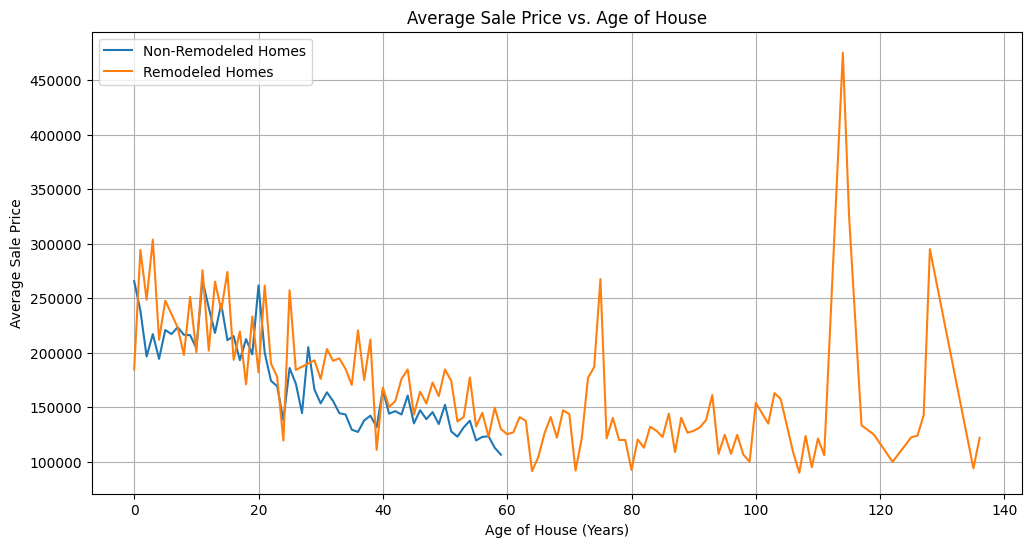

The Correlation between age and sale price is -0.523.


In [ ]:
import matplotlib.pyplot as plt

# Calculate the age of the house
train['Age'] = (train['YrSold'] - train['YearBuilt'])

# Calculate the average sale price for each age
average_saleprice_by_age = train.groupby(['Age','IsRemodeled'])['SalePrice'].mean().reset_index()

average_saleprice_by_age_non_remod = average_saleprice_by_age[average_saleprice_by_age['IsRemodeled'] == 0]
average_saleprice_by_age_remod = average_saleprice_by_age[average_saleprice_by_age['IsRemodeled'] == 1]
# Create a line plot of average SalePrice vs. Age
plt.figure(figsize=(12, 6))
plt.plot(average_saleprice_by_age_non_remod['Age'], average_saleprice_by_age_non_remod['SalePrice'], label = "Non-Remodeled Homes")
plt.plot(average_saleprice_by_age_remod['Age'], average_saleprice_by_age_remod['SalePrice'], label = "Remodeled Homes")

plt.title('Average Sale Price vs. Age of House')
plt.xlabel('Age of House (Years)')
plt.ylabel('Average Sale Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the correlation coefficient
correlation = round(train['Age'].corr(train['SalePrice']),3)
print("The Correlation between age and sale price is " + str(correlation) + ".")

In [ ]:
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold



# Helpers
#calculate model error; rmse measures absolute price error/rmsle measures log scaled error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    y_true_c = np.clip(y_true, 0, None)
    y_pred_c = np.clip(y_pred, 0, None)
    return np.sqrt(mean_squared_log_error(y_true_c, y_pred_c))

#wraps any regressor so it trains on log(Saleprice) and automatically converts predictions back to real dollars
#if skewed
#many regression assume (Lin, lasso, SVR) normally distributed + model residuals have constant variance, so logging
#makes distribution closer to normal whcih helps models fit better
#it models relative chances not absolute (percentage errors instead of raw dollar differences)
#A $10,000 error on a $100,000 home (10%) is much worse than a $10,000 error on a $1,000,000 home (1%)

def ttr(model):
    return TransformedTargetRegressor(regressor=model, func=np.log1p, inverse_func=np.expm1)

#one hot encoder (Categorical to dummy)
def make_ohe():
    try:
        return OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(drop="first", handle_unknown="ignore", sparse=False)

# Data + preprocessing
y = train["SalePrice"].copy()
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["SalePrice", "Id"]]
cat_cols = train.select_dtypes(include=["object", "category"]).columns.tolist()
X = train[num_cols + cat_cols].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=341)

#preprocessing
#numeric, fill missing w median, scales features
#categorical, fill missing w most freq, dummy variables
#combine both sub piplines, so transformed simulatenously
numeric_pipe = Pipeline([("impute", SimpleImputer(strategy="median")), ("scale", StandardScaler())])
categorical_pipe = Pipeline([("impute", SimpleImputer(strategy="most_frequent")), ("ohe", make_ohe())])

preprocess = ColumnTransformer([("num", numeric_pipe, num_cols), ("cat", categorical_pipe, cat_cols)], remainder="drop")

#fit specific regression model on log-target tranformation
def make_pipe(base_model):
    return Pipeline([("prep", preprocess), ("ttr", ttr(base_model))])


# models = {
#     "Linear": make_pipe(LinearRegression()),
# }


linreg = make_pipe(LinearRegression())
#train
linreg.fit(X_train, y_train)
#validate
pred = linreg.predict(X_val)
#Evaluate
print(f"RMSE:  ${rmse(y_val, pred):,.0f}")
print(f"RMSLE: {rmsle(y_val, pred):.4f}")


#base model and search grid for alpha (penalty strength)
#lasso = make_pipe(Lasso(random_state=341, max_iter=10000))
ridge_alph = make_pipe(Ridge(random_state=341, max_iter=10000))

#20 possible values of the penalty strength (α) from 0.0001 to 10, spaced logarithmically.
alpha_grid = np.logspace(-4, 1, 20)

#5-fold cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=341)

#grid search over alpha values (lower is better)
search = GridSearchCV(ridge_alph, param_grid={"ttr__regressor__alpha": alpha_grid}, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)

search.fit(X_train, y_train)

#best model and results
#best_lasso = search.best_estimator_
#print("Best alpha:", search.best_params_["ttr__regressor__alpha"])

#validate on hold-out set
#pred = best_lasso.predict(X_val)
#print(f"RMSE:  ${rmse(y_val, pred):,.0f}")
#print(f"RMSLE: {rmsle(y_val, pred):.4f}")


best_ridge = search.best_estimator_
# Extract the best alpha from the best estimator
best_alpha = best_ridge.named_steps['ttr'].regressor.alpha
ridge = make_pipe(Ridge(alpha= best_alpha))
ridge.fit(X_train, y_train)
pred = ridge.predict(X_val)
print(f"RMSE:  ${rmse(y_val, pred):,.0f}")
print(f"RMSLE: {rmsle(y_val, pred):.4f}")

#After tuning the model, the housing price predictions became much more accurate.
#The Root Mean Squared Error (RMSE) decreased from about $49,900 to $41,500, meaning that on
#average, the predicted sale prices are now within roughly $41,000 of the actual values.
#In other words, if a house sells for $400,000, the model would typically predict a price
#between about $358,000 and $442,000. The Root Mean Squared Log Error (RMSLE) also dropped from 0.2602
#to 0.1823, showing that the model’s relative error improved as well, its predictions are now off by
#about 18% on average in percentage terms. This is especially meaningful when housing prices vary widely,
#since RMSLE reflects proportional accuracy rather than raw dollar difference. Overall, the tuned model
#with an optimal alpha of 0.078 performs better at balancing bias and variance, resulting in more reliable
# and realistic housing price predictions.

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [14, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


RMSE:  $48,973
RMSLE: 0.2728
RMSE:  $36,844
RMSLE: 0.1412


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [14, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Decision Tree model
dt_model = make_pipe(DecisionTreeRegressor(random_state=341, max_depth = 4))

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
pred_dt = dt_model.predict(X_val)

# Evaluate the model
print("Decision Tree Model Evaluation:")
print(f"RMSE:  ${rmse(y_val, pred_dt):,.0f}")
print(f"RMSLE: {rmsle(y_val, pred_dt):.4f}")

Decision Tree Model Evaluation:
RMSE:  $40,029
RMSLE: 0.1978


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [14, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
